## 영화 관객수 예측 모델 개발
### 1. movies_train.csv / movies_test.csv
- title : 영화의 제목
- distributor : 배급사
- genre : 장르
- release_time : 개봉일
- time : 상영시간(분)
- screening_rat : 상영등급
- director : 감독이름
- dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
- dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
- num_staff : 스텝수
- num_actor : 주연배우수
- box_off_num : 관객수

### 2.  submission.csv (제출 파일 형식)

### 3. 데이터 상세 설명
- 2010년대 한국에서 개봉한 한국영화 600개에 대한 감독, 이름, 상영등급, 관객수 등의 정보가 담긴 데이터


#### `1.` 라이브러리 임포트

In [1]:
import pandas as pd
import matplotlib.pyplot as plt                  # 상관관계를 시각화 하기 위한 라이브러리 입니다.
import seaborn as sns                            # 상관관계를 시각화 하기 위한 라이브러리 입니다.
import numpy as np
from sklearn.preprocessing import LabelEncoder   # 레이블 인코딩을 위한 함수 입니다.
from sklearn.preprocessing import StandardScaler # 피쳐의 표준화 작업을 진행할 스케일러 함수 입니다.

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


#### `2.` 데이터 로드

In [2]:
train_data = pd.read_csv('./영화 관객수/movies_train.csv')
test_data = pd.read_csv('./영화 관객수/movies_test.csv')
submission = pd.read_csv('./영화 관객수/submission.csv')

#### `3.` 데이터 기본 정보 확인

In [3]:
display(train_data)
print(train_data.info())
display(test_data)
print(test_data.info())
display(submission)
print(submission.info())

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB
None


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1
...,...,...,...,...,...,...,...,...,...,...,...
238,해에게서 소년에게,디씨드,드라마,2015-11-19,78,15세 관람가,안슬기,2.590000e+03,1,4,4
239,울보 권투부,인디스토리,다큐멘터리,2015-10-29,86,12세 관람가,이일하,NaN,0,18,2
240,어떤살인,(주)컨텐츠온미디어,느와르,2015-10-28,107,청소년 관람불가,안용훈,NaN,0,224,4
241,말하지 못한 비밀,(주)씨타마운틴픽쳐스,드라마,2015-10-22,102,청소년 관람불가,송동윤,5.069900e+04,1,68,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB
None


,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0
...,...,...
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        243 non-null    object
 1   box_off_num  243 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.9+ KB
None


#### `4.` 데이터 전처리: 상관관계 확인

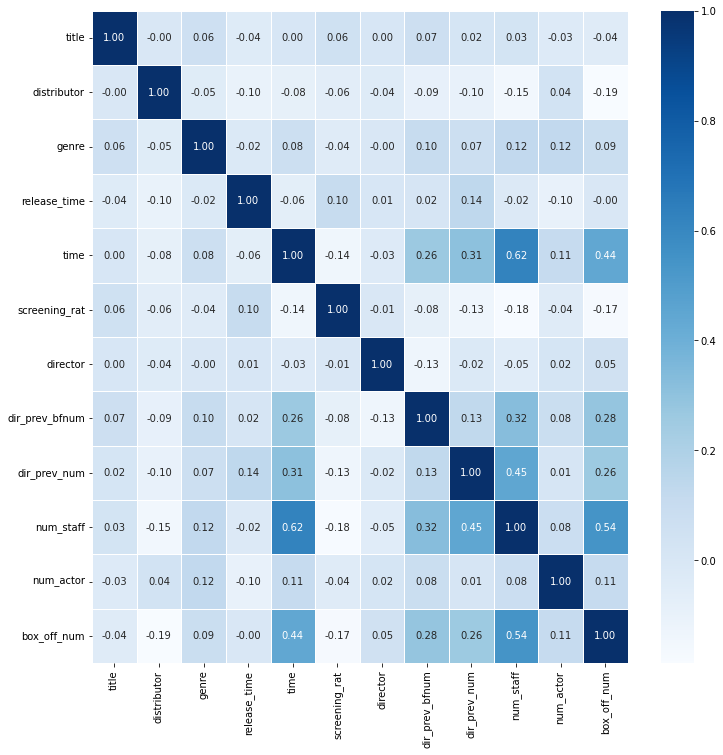

In [4]:
# 각 컬럼별 상관관계를 확인하기 위해 범주형 데이터를 레이블 인코딩 하겠습니다.
# 원본 데이터는 두고 상관관계 분석만을 위한 데이터프레임을 하나 더 만들어줍니다.
train_data_corr = train_data.copy()

# LabelEncoder 모델을 l_encoder 변수에 할당합니다.
l_encoder = LabelEncoder()

# 리스트로 묶인 컬럼의 이름으로 데이터 인코딩을 진행합니다.
for i in ['title', 'distributor', 'genre', 'release_time', 'screening_rat', 'director'] :
    train_data_corr[i] = l_encoder.fit_transform(train_data_corr[i])

# 히트맵으로 각 데이터별 상관관계를 시각화합니다.
plt.figure(figsize=(12,12))              # plt.figure(figsize=(15,15)): 15x15의 크기로 그림을 그려달라는 것입니다.
sns.heatmap(data=train_data_corr.corr(), # data=: 시각화에 사용할 자료를 선택합니다.
            annot=True,                  # annot=: 셀 안에 숫자 표시 여부를 지정합니다.
            fmt='.2f',                   # fmt=: annot=True인 경우 숫자의 표시 형식을 지정합니다.
            linewidths=.5,               # linewidths=: 각 셀을 나눌 선의 두께를 지정합니다. 
            cmap='Blues')                # cmap=: 표의 섹상을 지정합니다.
plt.show()

#### `5.` 데이터 전처리: 드랍

In [5]:
# 위 상관관계를 확인하였을때 타겟을 기준으로 0.05 미만의 계수를 가진 컬럼은 연산비용을 줄이기 위해 드랍하겠습니다.
# title 컬럼은 계수 -0.04로 드랍하겠습니다.
train_data.drop(columns=['title'], inplace=True)
test_data.drop(columns=['title'], inplace=True)

# 'release_time' 컬럼은 계수 -0.00으로 드랍하겠습니다.
train_data.drop(columns=['release_time'], inplace=True)
test_data.drop(columns=['release_time'], inplace=True)

# 데이터를 확인합니다.
display(train_data)
display(test_data)

,distributor,genre,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,롯데엔터테인먼트,액션,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,(주)쇼박스,느와르,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,(주)쇼박스,액션,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,(주)NEW,코미디,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,쇼박스(주)미디어플렉스,코미디,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...
595,(주)NEW,드라마,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,(주)쇼박스,드라마,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,(주)마운틴픽쳐스,공포,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,CJ 엔터테인먼트,느와르,102,15세 관람가,백운학,NaN,0,431,4,2192525


,distributor,genre,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,시네마서비스,느와르,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,(주)쇼박스,멜로/로맨스,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,CJ 엔터테인먼트,드라마,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,(주)쇼박스,액션,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,CJ 엔터테인먼트,공포,110,15세 관람가,권호영,3.173800e+04,1,380,1
...,...,...,...,...,...,...,...,...,...
238,디씨드,드라마,78,15세 관람가,안슬기,2.590000e+03,1,4,4
239,인디스토리,다큐멘터리,86,12세 관람가,이일하,NaN,0,18,2
240,(주)컨텐츠온미디어,느와르,107,청소년 관람불가,안용훈,NaN,0,224,4
241,(주)씨타마운틴픽쳐스,드라마,102,청소년 관람불가,송동윤,5.069900e+04,1,68,7


#### `6.` 데이터 전처리: 결측치 치환

In [6]:
# dir_prev_bfnum 컬럼의 결측치가 있는 행의 dir_prev_num 컬럼 행을 보면 모두 0임을 알 수 있습니다.
# 이 말인즉, 이전에 영화를 만들어본 적이 없는 감독이어서 이전에 참여한 영화의 평균 관객 수가 집계되지 않아 결측값이
# 생겼다고 할 수 있습니다. 해당 가설을 확인해 보겠습니다.
# dir_prev_bfnum 컬럼의 결측값이 있는 행의 dir_prev_num 컬럼을 모두 더 해봤을 때 가설이 맞다면 합계의 값이 0이 나올
# 것이고 그렇지 않다면 0 이상의 수가 나올 것입니다. 합산 결과 0으로 가설이 맞는다는 게 증명되었습니다.
print(train_data[train_data['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())
print(test_data[test_data['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())

# dir_prev_bfnum 컬럼의 결측값을 0으로 치환합니다.
train_data['dir_prev_bfnum'].fillna(0, inplace=True)
test_data['dir_prev_bfnum'].fillna(0, inplace=True)

# 치환 후 결측값을 확인해보겠습니다.
print('----------train_data의 결측값 확인----------')
print(train_data.isnull().sum())
print('----------test_data의 결측값 확인----------')
print(test_data.isnull().sum())

0
0
----------train_data의 결측값 확인----------
distributor       0
genre             0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
dtype: int64
----------test_data의 결측값 확인----------
distributor       0
genre             0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
dtype: int64


#### `7-1.` 데이터 전처리: 이상치 확인

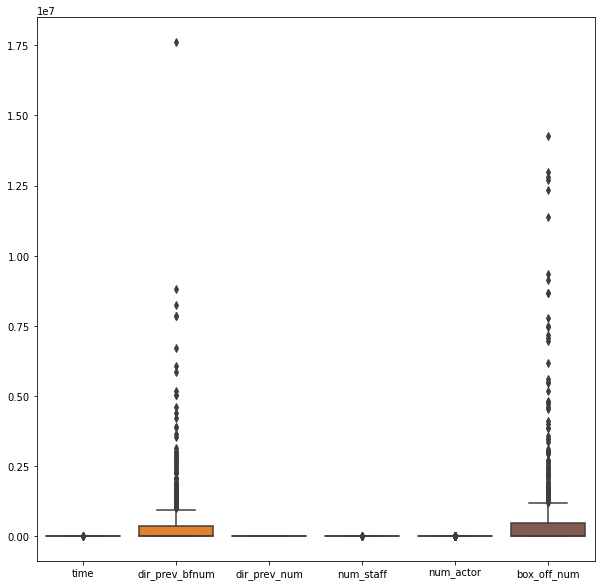

In [7]:
# 이상치를 시각화하여 확인합니다.
plt.figure(figsize=(10, 10))
sns.boxplot(data=train_data)
plt.show()

#### `7-2.` 데이터 전처리: 이상치 제거

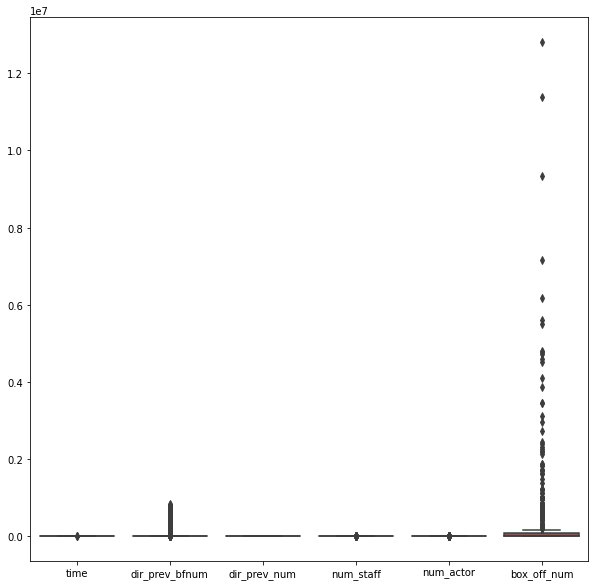

In [8]:
# 이상치를 제거하는 함수입니다.
def get_outlier(df=None, column=None, weight=1.5):
    
    # target 값과 상관관계가 높은 열을 우선적으로 진행
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR * weight
  
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
  
    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

# 타겟값의 상관계수가 높은 컬럼순으로 함수를 사용하여 반환된 인덱스 번호로 이상치를 제거합니다.
for i in ['num_staff', 'time', 'dir_prev_bfnum', 'dir_prev_num'] :
    outlier_idx = get_outlier(df=train_data, column=i, weight=1.5)
    train_data.drop(outlier_idx, axis=0, inplace=True)

# 이상치 제거 후 데이터를 시각화 합니다.
plt.figure(figsize=(10, 10))
sns.boxplot(data=train_data)
plt.show()

#### `8.` 데이터 전처리: 범주형 데이터 원-핫 인코딩

In [9]:
# 배급사 데이터의 명확성을 위하여 (주)를 없애고 인코딩을 진행하겠습니다.
train_data['distributor'] = train_data.distributor.str.replace("(주)", '')
test_data['distributor'] = test_data.distributor.str.replace("(주)", '')

# 원핫 인코딩을 진행합니다.
for i in ['distributor', 'genre', 'screening_rat', 'director'] :
    pd.get_dummies(data=train_data, columns=[i])

C:\Users\HPE\AppData\Local\Temp\ipykernel_5616\3294687341.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['distributor'] = train_data.distributor.str.replace("(주)", '')
C:\Users\HPE\AppData\Local\Temp\ipykernel_5616\3294687341.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['distributor'] = test_data.distributor.str.replace("(주)", '')


#### `9-1.` 데이터 전처리: 피쳐와 타겟 분리

In [10]:
# 모델의 학습을 할 데이터를 조정합니다.
# 피쳐로 사용할 데이터는 타겟값을 드랍한 나머지 특성을 전달합니다.
feature_train = train_data.copy().drop(['box_off_num'], axis=1)
feature_test = test_data.copy()

# 타겟으로 사용할 원본 데이터의 box_off_num 열을 넘겨줍니다.
target_train = train_data['box_off_num']

# 데이터를 확인합니다.
display(feature_train)
display(feature_test)
display(target_train)

,distributor,genre,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,롯데엔터테인먼트,액션,96,청소년 관람불가,조병옥,0.0,0,91,2
3,()NEW,코미디,101,전체 관람가,구자홍,23894.0,2,20,6
4,쇼박스()미디어플렉스,코미디,108,15세 관람가,신근호,1.0,1,251,2
5,롯데엔터테인먼트,코미디,113,15세 관람가,육상효,837969.0,2,262,4
6,백두대간,다큐멘터리,104,전체 관람가,이창재,0.0,0,32,5
...,...,...,...,...,...,...,...,...,...
595,()NEW,드라마,111,청소년 관람불가,심성보,3833.0,1,510,7
596,()쇼박스,드라마,127,15세 관람가,윤종찬,496061.0,1,286,6
597,()마운틴픽쳐스,공포,99,청소년 관람불가,김대현,0.0,0,123,4
598,CJ 엔터테인먼트,느와르,102,15세 관람가,백운학,0.0,0,431,4


,distributor,genre,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,시네마서비스,느와르,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,()쇼박스,멜로/로맨스,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,CJ 엔터테인먼트,드라마,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,()쇼박스,액션,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,CJ 엔터테인먼트,공포,110,15세 관람가,권호영,3.173800e+04,1,380,1
...,...,...,...,...,...,...,...,...,...
238,디씨드,드라마,78,15세 관람가,안슬기,2.590000e+03,1,4,4
239,인디스토리,다큐멘터리,86,12세 관람가,이일하,0.000000e+00,0,18,2
240,()컨텐츠온미디어,느와르,107,청소년 관람불가,안용훈,0.000000e+00,0,224,4
241,()씨타마운틴픽쳐스,드라마,102,청소년 관람불가,송동윤,5.069900e+04,1,68,7


0        23398
3       217866
4       483387
5       233211
6        53526
        ...   
595    1475091
596    1716438
597       2475
598    2192525
599    7166532
Name: box_off_num, Length: 470, dtype: int64

#### `9-2.` 데이터 전처리: 스케일링

In [11]:
# 표준화를 위해 스케일러 모델을 scaler 변수에 할당하여 객체를 생성하겠습니다.
scaler = StandardScaler()

# 표준화 작업을 진행합니다.
scaler.fit_transform(train_data)
scaler.transform(test_data)

ValueError: could not convert string to float: '롯데엔터테인먼트'